## Part I: Data Cleaning and Exploration

#### Step 1: import dependencies

In [1]:
#import dependencies
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, ShuffleSplit, GridSearchCV
from sklearn.metrics import roc_auc_score, roc_curve, auc

#### Step 2: read csv file and observe dataset (columns, shape, datatypes, missing values)

In [6]:
# read the csv file into a pandas dataframe
allDataClean = pd.read_csv("cardioRiskDataset.csv",header=0)

# preview dataset
allDataClean.head()

,ID,Gender,Age,EverMarried,WorkType,ResidenceType,AvgGlucose,BMI,SmokingStatus,Risk
0,53882,Male,74.0,Yes,Private,Rural,70.09,27.4,never smoked,3
1,712,Female,82.0,No,Private,Rural,84.03,26.5,formerly smoked,3
2,53401,Male,71.0,No,Govt_job,Rural,216.94,30.9,never smoked,3
3,37651,Female,69.0,No,Self-employed,Urban,72.17,36.8,never smoked,3
4,60739,Female,79.0,No,Self-employed,Rural,60.94,NaN,never smoked,3


In [7]:
# delete ID column because it won't be useful for machine learning
del allDataClean["ID"]

# view dataset information - specifically datatypes
allDataClean.info()

# Notice that there are missing values in BMI and Smoking Status.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43400 entries, 0 to 43399
Data columns (total 9 columns):
Gender           43400 non-null object
Age              43400 non-null float64
EverMarried      43400 non-null object
WorkType         43400 non-null object
ResidenceType    43400 non-null object
AvgGlucose       43400 non-null float64
BMI              41938 non-null float64
SmokingStatus    30108 non-null object
Risk             43400 non-null int64
dtypes: float64(3), int64(1), object(5)
memory usage: 3.0+ MB


About 30% of the Smoking Status data is missing, because >10%, safe to delete it. <br>
About 3% of the BMI data is missing, because less than 10% will impute it. <br>

In [8]:
# remove Smoking Status column from dataframe
del allDataClean["SmokingStatus"]

# Impute missing BMI Data
from sklearn.preprocessing import Imputer
imputer = Imputer(missing_values = 'NaN', strategy = 'mean', axis = 0)
imputer = imputer.fit(allDataClean[["BMI"]])
allDataClean['BMI'] = imputer.transform(allDataClean[['BMI']]).ravel()

allDataClean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43400 entries, 0 to 43399
Data columns (total 8 columns):
Gender           43400 non-null object
Age              43400 non-null float64
EverMarried      43400 non-null object
WorkType         43400 non-null object
ResidenceType    43400 non-null object
AvgGlucose       43400 non-null float64
BMI              43400 non-null float64
Risk             43400 non-null int64
dtypes: float64(3), int64(1), object(4)
memory usage: 2.6+ MB


#### Step 3: Explore target variable's (Risk) proportion in dataset

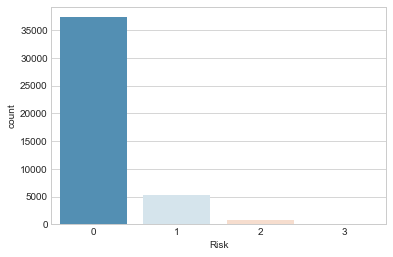

In [9]:
# view initial proportion of risk factor among population
sns.set_style('whitegrid')
sns.countplot(x='Risk',data=allDataClean,palette='RdBu_r')

In [10]:
# To increase balance of higher risk to lower risk, will group risk levels 1, 2, and 3 together as high risk and 0 as low risk:
allDataClean['Risk'] = allDataClean['Risk'].replace({0: 'low', 1: 'high', 2: 'high', 3: 'high'})

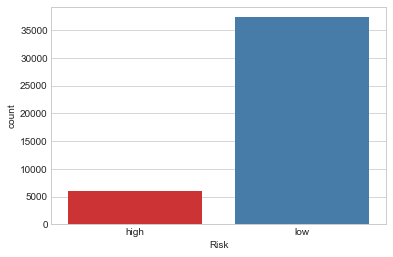

In [11]:
# Now, view new proportion of risk factor among population
sns.set_style('whitegrid')
sns.countplot(x='Risk',data=allDataClean,palette='Set1')

In [12]:
allDataClean.groupby('Risk').count()

,Gender,Age,EverMarried,WorkType,ResidenceType,AvgGlucose,BMI
Risk,,,,,,,
high,6066,6066,6066,6066,6066,6066,6066
low,37334,37334,37334,37334,37334,37334,37334


the dataset is still a bit unbalanced but is acceptable as higher risk for marjor cardio diseases  accounts for about 13% of the dataset.

##### In Step 9, use the Imbalanced-Learn library (built on top of Scikit-Learn) using the SMOTE algorithm to create a balanced dataset through oversampling.

#### Step4: Explore Data for Feature Selection

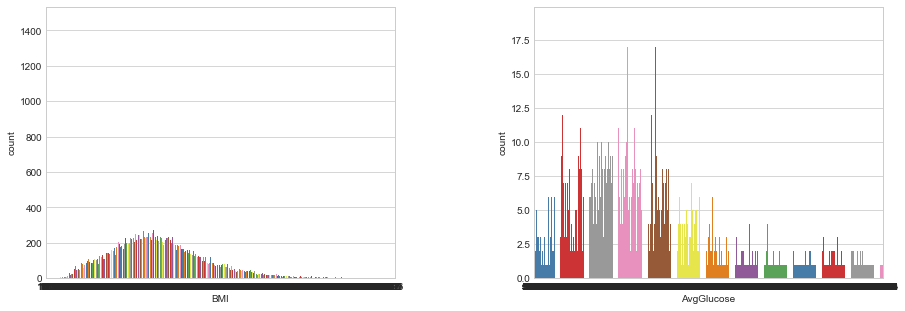

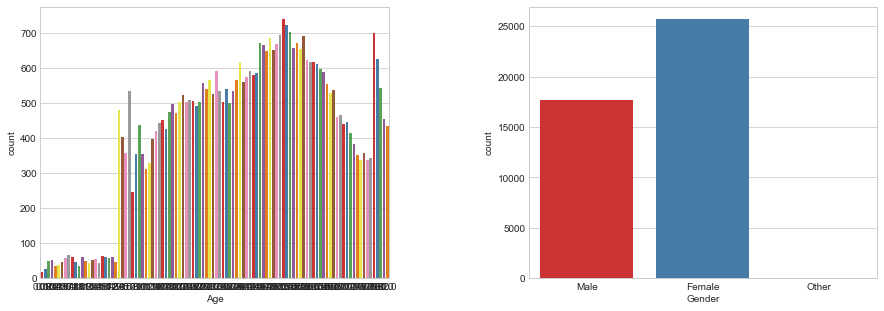

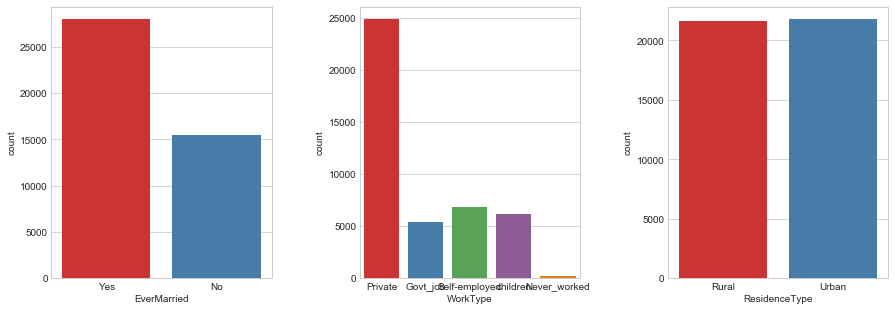

In [13]:
# view count by attribute
fig, axs = plt.subplots(ncols=2)
sns.set_style('whitegrid')
fig.set_size_inches(15, 5)
fig.subplots_adjust(hspace=0.6, wspace=0.4)
ax = sns.countplot(x='BMI',data=allDataClean,palette='Set1', ax=axs[0])
ax = sns.countplot(x='AvgGlucose',data=allDataClean,palette='Set1', ax=axs[1])

fig, axs = plt.subplots(ncols=2)
sns.set_style('whitegrid')
fig.set_size_inches(15, 5)
fig.subplots_adjust(hspace=0.6, wspace=0.4)
ax = sns.countplot(x='Age',data=allDataClean,palette='Set1', ax=axs[0])
ax = sns.countplot(x='Gender',data=allDataClean,palette='Set1',ax=axs[1])

fig, axs = plt.subplots(ncols=3)
sns.set_style('whitegrid')
fig.set_size_inches(15, 5)
fig.subplots_adjust(hspace=0.6, wspace=0.4)
ax = sns.countplot(x='EverMarried',data=allDataClean,palette='Set1', ax=axs[0])
ax = sns.countplot(x='WorkType',data=allDataClean,palette='Set1', ax=axs[1])
ax = sns.countplot(x='ResidenceType',data=allDataClean,palette='Set1', ax=axs[2])

observe that other gender and never_worked are underrepresented in Gender and Work Type

In [16]:
# delete 'other' category in gender since it's under-represented
allDataClean = allDataClean[allDataClean.Gender != 'Other']

# delete "Never_worked" category since under-represented
allDataClean = allDataClean[allDataClean.WorkType != 'Never_worked']

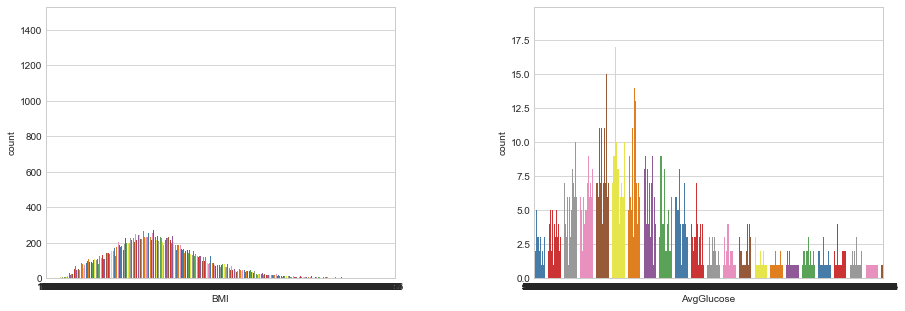

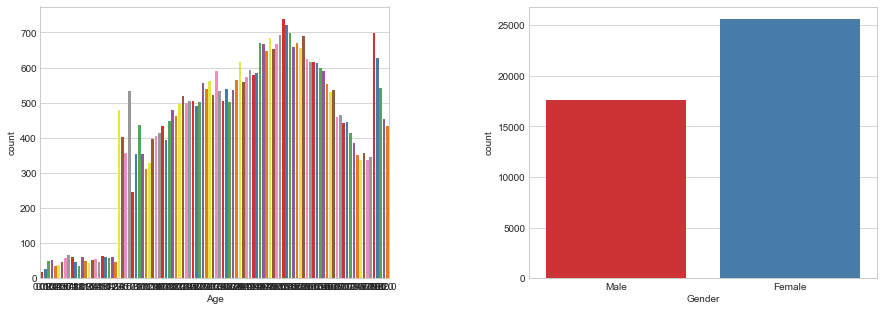

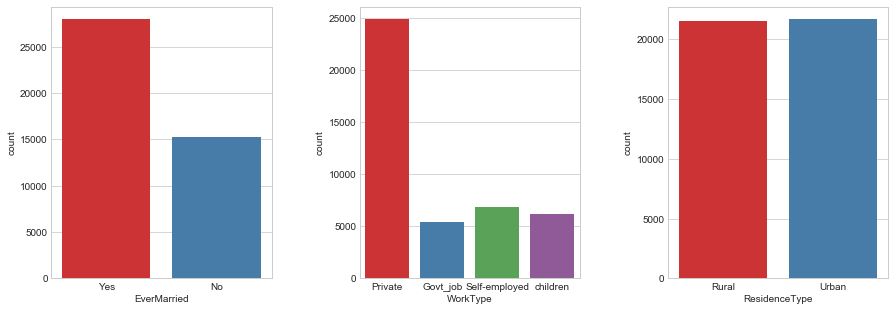

In [17]:
# view count by attribute
fig, axs = plt.subplots(ncols=2)
sns.set_style('whitegrid')
fig.set_size_inches(15, 5)
fig.subplots_adjust(hspace=0.6, wspace=0.4)
ax = sns.countplot(x='BMI',data=allDataClean,palette='Set1', ax=axs[0])
ax = sns.countplot(x='AvgGlucose',data=allDataClean,palette='Set1', ax=axs[1])

fig, axs = plt.subplots(ncols=2)
sns.set_style('whitegrid')
fig.set_size_inches(15, 5)
fig.subplots_adjust(hspace=0.6, wspace=0.4)
ax = sns.countplot(x='Age',data=allDataClean,palette='Set1', ax=axs[0])
ax = sns.countplot(x='Gender',data=allDataClean,palette='Set1',ax=axs[1])

fig, axs = plt.subplots(ncols=3)
sns.set_style('whitegrid')
fig.set_size_inches(15, 5)
fig.subplots_adjust(hspace=0.6, wspace=0.4)
ax = sns.countplot(x='EverMarried',data=allDataClean,palette='Set1', ax=axs[0])
ax = sns.countplot(x='WorkType',data=allDataClean,palette='Set1', ax=axs[1])
ax = sns.countplot(x='ResidenceType',data=allDataClean,palette='Set1', ax=axs[2])

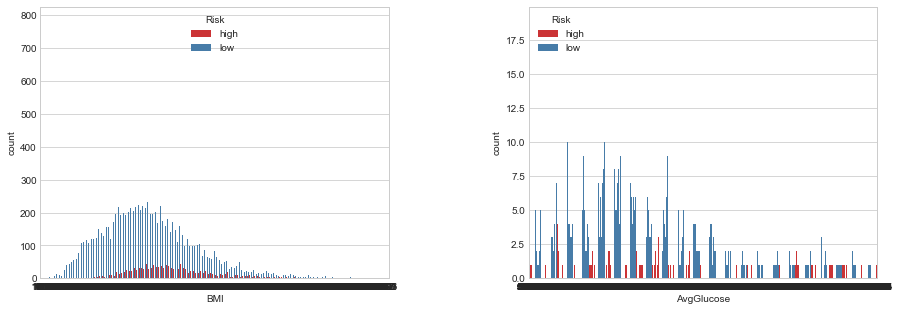

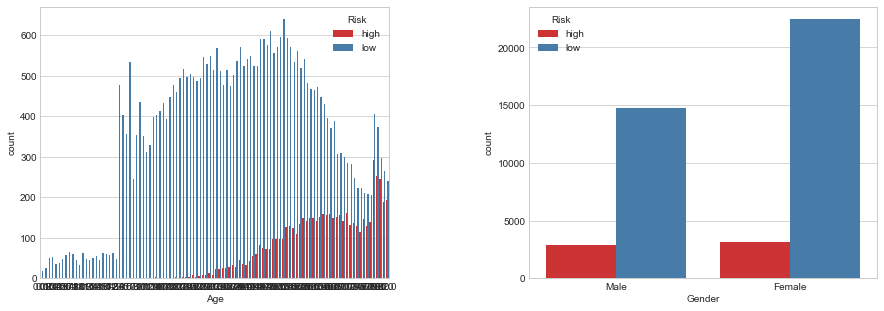

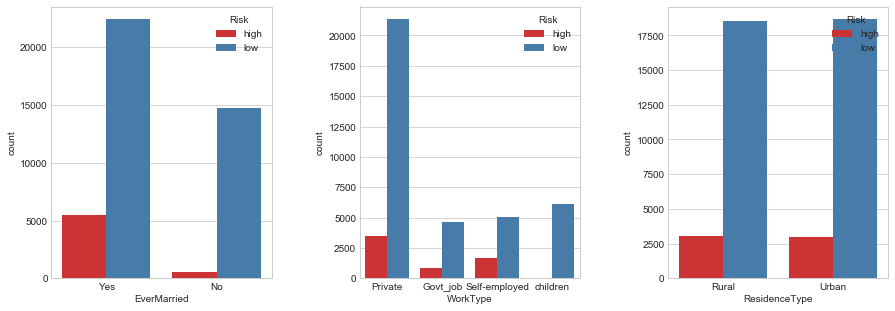

In [18]:
# view count of Risk by attribute (color = risk)
fig, axs = plt.subplots(ncols=2)
sns.set_style('whitegrid')
fig.set_size_inches(15, 5)
fig.subplots_adjust(hspace=0.6, wspace=0.4)
ax = sns.countplot(x='BMI',hue='Risk',data=allDataClean,palette='Set1', ax=axs[0])
ax = sns.countplot(x='AvgGlucose',hue='Risk',data=allDataClean,palette='Set1', ax=axs[1])

fig, axs = plt.subplots(ncols=2)
sns.set_style('whitegrid')
fig.set_size_inches(15, 5)
fig.subplots_adjust(hspace=0.6, wspace=0.4)
ax = sns.countplot(x='Age',hue='Risk',data=allDataClean,palette='Set1', ax=axs[0])
ax = sns.countplot(x='Gender',hue='Risk',data=allDataClean,palette='Set1',ax=axs[1])

fig, axs = plt.subplots(ncols=3)
sns.set_style('whitegrid')
fig.set_size_inches(15, 5)
fig.subplots_adjust(hspace=0.6, wspace=0.4)
ax = sns.countplot(x='EverMarried',hue='Risk',data=allDataClean,palette='Set1', ax=axs[0])
ax = sns.countplot(x='WorkType',hue='Risk',data=allDataClean,palette='Set1', ax=axs[1])
ax = sns.countplot(x='ResidenceType',hue='Risk',data=allDataClean,palette='Set1', ax=axs[2])

NameError: name 'allDataEncoded7' is not defined

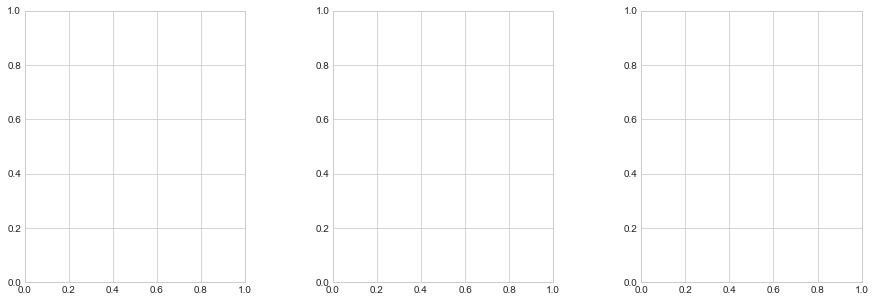

In [19]:
# explore outliers of continuous variables
fig, axs = plt.subplots(ncols=3)
sns.set_style('whitegrid')
fig.set_size_inches(15, 5)
fig.subplots_adjust(hspace=0.6, wspace=0.4)
ax = sns.boxplot(x="Risk_low", y="Age", data=allDataEncoded7, ax=axs[0])
ax = sns.boxplot(x="Risk_low", y="AvgGlucose", data=allDataEncoded7, ax=axs[1])
ax = sns.boxplot(x="Risk_low", y="BMI", data=allDataEncoded7, ax=axs[2])

#### Step5: Transform Categorical Features into Numeric

In [20]:
# view encoded dataset information again
allDataEncoded7.info() 
# observe that 4 variables are categorical and need to be converted

NameError: name 'allDataEncoded7' is not defined

In [21]:
# Convert categorical data to numbers using binary encoding with get_dummies
allDataEncoded = allDataClean.copy()
# encode gender
genderFeatures = ['Gender']
allDataEncoded = pd.get_dummies(allDataClean,columns=genderFeatures,drop_first=True)
# then encode ever married
marriedFeatures = ['EverMarried']
allDataEncoded2 = pd.get_dummies(allDataEncoded,columns=marriedFeatures,drop_first=True)
# then encode work
workFeatures = ['WorkType']
allDataEncoded3 = pd.get_dummies(allDataEncoded2,columns=workFeatures,drop_first=True)
# then encode risk
encodeRisk = ['Risk']
allDataEncoded4 = pd.get_dummies(allDataEncoded3,columns=encodeRisk,drop_first=True)
# then encode res type
encodeRes = ['ResidenceType']
allDataEncoded7 = pd.get_dummies(allDataEncoded4,columns=encodeRes,drop_first=True)

# observe descriptive statistics related to new dummy variables
allDataEncoded7.describe()

,Age,AvgGlucose,BMI,Gender_Male,EverMarried_Yes,WorkType_Private,WorkType_Self-employed,WorkType_children,Risk_low,ResidenceType_Urban
count,43212.000000,43212.000000,43212.000000,43212.000000,43212.000000,43212.000000,43212.000000,43212.000000,43212.000000,43212.000000
mean,42.319948,104.526833,28.615716,0.408405,0.646256,0.574539,0.157202,0.142414,0.859645,0.501203
std,22.508317,43.162225,7.641037,0.491544,0.478137,0.494418,0.363995,0.349478,0.347359,0.500004
min,0.080000,55.000000,10.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,24.000000,77.540000,23.400000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,44.000000,91.590000,28.100000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
75%,60.000000,112.100000,32.700000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,82.000000,291.050000,97.600000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


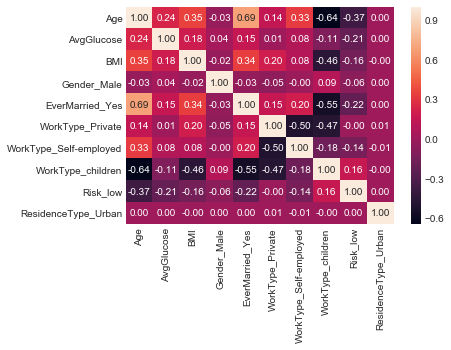

In [22]:
# explore multicolinearity of encoded data - in case consider using Naive Beyes
sns.heatmap(allDataEncoded7.corr(), annot=True, fmt=".2f")
plt.show()

looks like age is correlated with work type: "children", and marriage status,
which makes sense as individuals under 18 won't be working or married

Possibly delete individuals younger than 18?

In [23]:
# restrict age to greater than or equal to 18 
# because <18 might influence marriage and work status
# allDataClean = allDataClean[allDataClean.Age >= 18]

##### Based on Steps 1-5 we have a basic understanding of the attributes' distributions, relationships, and outliers and are one step closer to concluding which features to include in our final model.

##### Next, we will split the data to build a decision tree and random forest in order to numerically observe the most important features.

#### Step6: Split data into training set and testing set for evaluating feature importance

In [24]:
from sklearn.model_selection import train_test_split
X = allDataEncoded7.drop('Risk_low',axis=1)
y = allDataEncoded7['Risk_low']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=71, stratify=y)

# normalize
sds = StandardScaler()
sds.fit(X_train)
X_train = sds.transform(X_train)
X_test = sds.transform(X_test)

#### Step 7: train a decision tree model  to evaluate feature importance

In [25]:
# Import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

# Create an instance of DecisionTreeClassifier() called dtree and fit it to the training data.
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)

#### predict and evaluate decision tree 

# create predictions from the test set
predictions = dtree.predict(X_test)

# create a classification report and a coonfusion matrix
# from sklearn.metrics import classification_report,confusion_matrix
# print(classification_report(y_test,predictions))

# print(confusion_matrix(y_test,predictions))

# Note: 
# accuracy not good bc unbalanced dataset
# precision = 30% (only true positives)
# recall = 28%
# specificity = 8109 / (8109+937)

# print(f"Training Data Score: {dtree.score(X_train, y_train)}")
print(f"Average Accuracy Score of Testing Data: {dtree.score(X_test, y_test)}")

import os
import time
import sys

# use decision tree to consider feature importance
for i in range(3):
    
    t0 = time.time()
    clf = DecisionTreeClassifier()

    clf.fit(X_train, y_train)
    t1 = time.time()
    
    ypred = clf.predict(X_test)
    scores = roc_auc_score(y_test, ypred)
    
    print(f"Decision tree {i+1} took {t1-t0} seconds to train and got a score of {scores}")
    print()
    print("And here are the top features: ")
    c = X.columns 
    for cfi in zip(c, clf.feature_importances_):
        print(cfi)
    print()

Average Accuracy Score of Testing Data: 0.8032953809127095
Decision tree 1 took 0.24138760566711426 seconds to train and got a score of 0.6070586086091347

And here are the top features: 
('Age', 0.2762547143058364)
('AvgGlucose', 0.3686210996161401)
('BMI', 0.24240117454154939)
('Gender_Male', 0.02188895713982034)
('EverMarried_Yes', 0.015071740759795022)
('WorkType_Private', 0.023819334683642335)
('WorkType_Self-employed', 0.019535148267376505)
('WorkType_children', 0.0)
('ResidenceType_Urban', 0.03240783068583998)

Decision tree 2 took 0.20445966720581055 seconds to train and got a score of 0.6029257426544269

And here are the top features: 
('Age', 0.2791846499960039)
('AvgGlucose', 0.36356659980462863)
('BMI', 0.24203870404344893)
('Gender_Male', 0.02073478080604998)
('EverMarried_Yes', 0.015194438277486991)
('WorkType_Private', 0.024729167227707047)
('WorkType_Self-employed', 0.020619979099225735)
('WorkType_children', 0.0)
('ResidenceType_Urban', 0.03393168074544882)

Decision t

Based on decision tree, looks like glucose, bmi, and age are most important in predicting risk <br>
followed by residence type, worktype, marriage status and gender <br>

keep in mind that the average accuracy of this decision tree is only about 77%

#### Step 8: Train a random forest model to evaluate potential features

In [26]:
# create an instance of the random forest classifer class 
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=600)
rfc.fit(X_train,y_train)
print(f"Average Accuracy Score of Testing Data: {rfc.score(X_test, y_test)}")
importances = rfc.feature_importances_
feature_importances = pd.DataFrame(rfc.feature_importances_, index = X.columns, columns=['importance']).sort_values('importance',ascending=False)
print(feature_importances)

Average Accuracy Score of Testing Data: 0.8514301582893641
                        importance
AvgGlucose                0.352738
BMI                       0.288750
Age                       0.270447
EverMarried_Yes           0.022058
ResidenceType_Urban       0.021194
Gender_Male               0.015338
WorkType_Private          0.014114
WorkType_Self-employed    0.012286
WorkType_children         0.003074


Based on random forest feature evaluation, 
- Glucose, BMI, and Age appear are most useful in predicting cardiovascular risk,
- followed by Marriage Status, residence type, and gender, 
- while work type appears to be least effective feature in cardiovascular risk prediction.

Because random forest's average accuracy is a bit higher, we will give more weight to it's ranking of feature importance

##### Decide to use Glucose, BMI, Age, Marriage Status, Residence Type, and Gender for Models

#### Step9: Split dataset and create a balanced sample through over-sampling

In [27]:
# use the Imbalanced-Learn library (built on top of Scikit-Learn) using the SMOTE algorithm 
# to create a balanced sample.
!pip install -U imbalanced-learn
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
 
X = allDataEncoded7.drop('Risk_low',axis=1)
y = allDataEncoded7['Risk_low']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=71, stratify=y)
sm = SMOTE(random_state=12, ratio = 1.0)
x_train_res, y_train_res = sm.fit_sample(X_train, y_train)

  Using cached https://files.pythonhosted.org/packages/e5/4c/7557e1c2e791bd43878f8c82065bddc5798252084f26ef44527c02262af1/imbalanced_learn-0.4.3-py3-none-any.whl


You are using pip version 18.1, however version 19.0.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [28]:
X_train.groupby('ResidenceType_Urban').count()

,Age,AvgGlucose,BMI,Gender_Male,EverMarried_Yes,WorkType_Private,WorkType_Self-employed,WorkType_children
ResidenceType_Urban,,,,,,,,
0,16115,16115,16115,16115,16115,16115,16115,16115
1,16294,16294,16294,16294,16294,16294,16294,16294


In [29]:
X_train.groupby('ResidenceType_Urban').count()

,Age,AvgGlucose,BMI,Gender_Male,EverMarried_Yes,WorkType_Private,WorkType_Self-employed,WorkType_children
ResidenceType_Urban,,,,,,,,
0,16115,16115,16115,16115,16115,16115,16115,16115
1,16294,16294,16294,16294,16294,16294,16294,16294


Now the dataset is closer to 50-50

In [30]:
y_train.describe()

count    32409.000000
mean         0.859638
std          0.347368
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: Risk_low, dtype: float64

## 1.  Logistic Regression

In [31]:
from sklearn.linear_model import LogisticRegression

In [32]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

### Predictions and Evaluations
Now predict values for the testing data.

In [33]:
predictions = logmodel.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report

In [36]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.49      0.11      0.18      1516
          1       0.87      0.98      0.92      9287

avg / total       0.82      0.86      0.82     10803



# 2.  Support Vector Classifier

In [37]:
from sklearn.svm import SVC

In [38]:
svc_model = SVC()

In [39]:
svc_model.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

# Model Evaluation
Now get predictions from the model and create a confusion matrix and a classification report.

In [54]:
predictions = svc_model.predict(X_test)

In [55]:
from sklearn.metrics import classification_report,confusion_matrix

In [56]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.44      0.09      0.15      1516
          1       0.87      0.98      0.92      9287

avg / total       0.81      0.86      0.81     10803



In [57]:
print(confusion_matrix(y_test,predictions))

[[ 133 1383]
 [ 169 9118]]


# 3.  Decision Trees

In [43]:
from sklearn.tree import DecisionTreeClassifier

In [44]:
dtree = DecisionTreeClassifier()

In [45]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

## Predictions and Evaluation of Decision Tree¶
Create predictions from the test set and create a classification report and a confusion matrix.

In [ ]:
predictions = dtree.predict(X_test)

In [46]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.44      0.09      0.15      1516
          1       0.87      0.98      0.92      9287

avg / total       0.81      0.86      0.81     10803



In [47]:
print(confusion_matrix(y_test,predictions))

[[ 133 1383]
 [ 169 9118]]


## Training the Random Forest model

In [48]:
from sklearn.ensemble import RandomForestClassifier

In [58]:
rfc = RandomForestClassifier(n_estimators=1000)

In [59]:
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [60]:
predictions = rfc.predict(X_test)

In [61]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.43      0.19      0.26      1516
          1       0.88      0.96      0.92      9287

avg / total       0.82      0.85      0.83     10803



In [62]:
print(confusion_matrix(y_test,predictions))

[[ 286 1230]
 [ 383 8904]]


In [464]:
#########################################

Apply Logistic Regression
Apply Support Vector Classifier, optimize on accuracy.
Apply Decision Tree Classifier, optimize on accuracy.
Apply Random Forest Classifier, optimize on accuracy

In [ ]:
# Apply logistic regression: with scikit-learn; with statsmodels.
# Find out which feature correlations cause the age coefficient to be negative.
# Make some correlation plots between the features age, thalach, and ca.
# Repeat fit on a subset of features (age and thalach, separately for ca=0 and ca>0)
# Which features should we keep?
# Find the set of features that yields the best accuracy score, using cross-validation.
# Try eliminating features with a non-significant coefficient, one by one, while keeping the model deviance as low as possible. We'll use this second method for the final results.
# Compute logistic regression model accuracy, precision and recall for the final selection of features and using the full training data set (biased estimation).
# Recompute accuracy, precision and recall using cross-validation to avoid bias.

# Apply Gaussian Naive Bayes, optimize on accuracy.

In [465]:
Apply Logistic Regression
Apply Support Vector Classifier, optimize on accuracy.
Apply Decision Tree Classifier, optimize on accuracy.
Apply Random Forest Classifier, optimize on accuracy